In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sofware.data_collector import get_data_for_period, get_stock_data
from sofware.data_processor import process_data
from sofware.tasks import run_back_test, plot_drawdown, plot_equity_curve
import mplfinance as mpf

%matplotlib inline
sns.set_style('darkgrid')

start_date = "2024-10-11 09:30:00"
end_date = "2024-10-11 12:00:00"
period = "1d"
ticker = "MSFT"
interval = "1m"
initial_cash = 1000

data = get_data_for_period(ticker=ticker, start_date=start_date, end_date=end_date, interval=interval)
print(data)

data = process_data(data, ticker=ticker, period=period)

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-11 09:30:00-04:00  415.910004  416.000000  414.174988  414.679993   
2024-10-11 09:31:00-04:00  414.470001  414.890015  414.150391  414.269989   
2024-10-11 09:32:00-04:00  414.260010  414.880005  414.209991  414.339996   
2024-10-11 09:33:00-04:00  414.355591  414.519989  413.950012  414.410004   
2024-10-11 09:34:00-04:00  414.341309  414.399994  414.079987  414.220001   
...                               ...         ...         ...         ...   
2024-10-11 11:55:00-04:00  415.480011  415.519989  415.339996  415.505005   
2024-10-11 11:56:00-04:00  415.519989  415.549896  415.470001  415.507599   
2024-10-11 11:57:00-04:00  415.524994  415.665009  415.510010  415.570007   
2024-10-11 11:58:00-04:00  415.575012  415.609985  415.433990  415.500000   
2024-10-11 11:59:00-04:00  415.500000  415.540009  415.410004  415.480011   

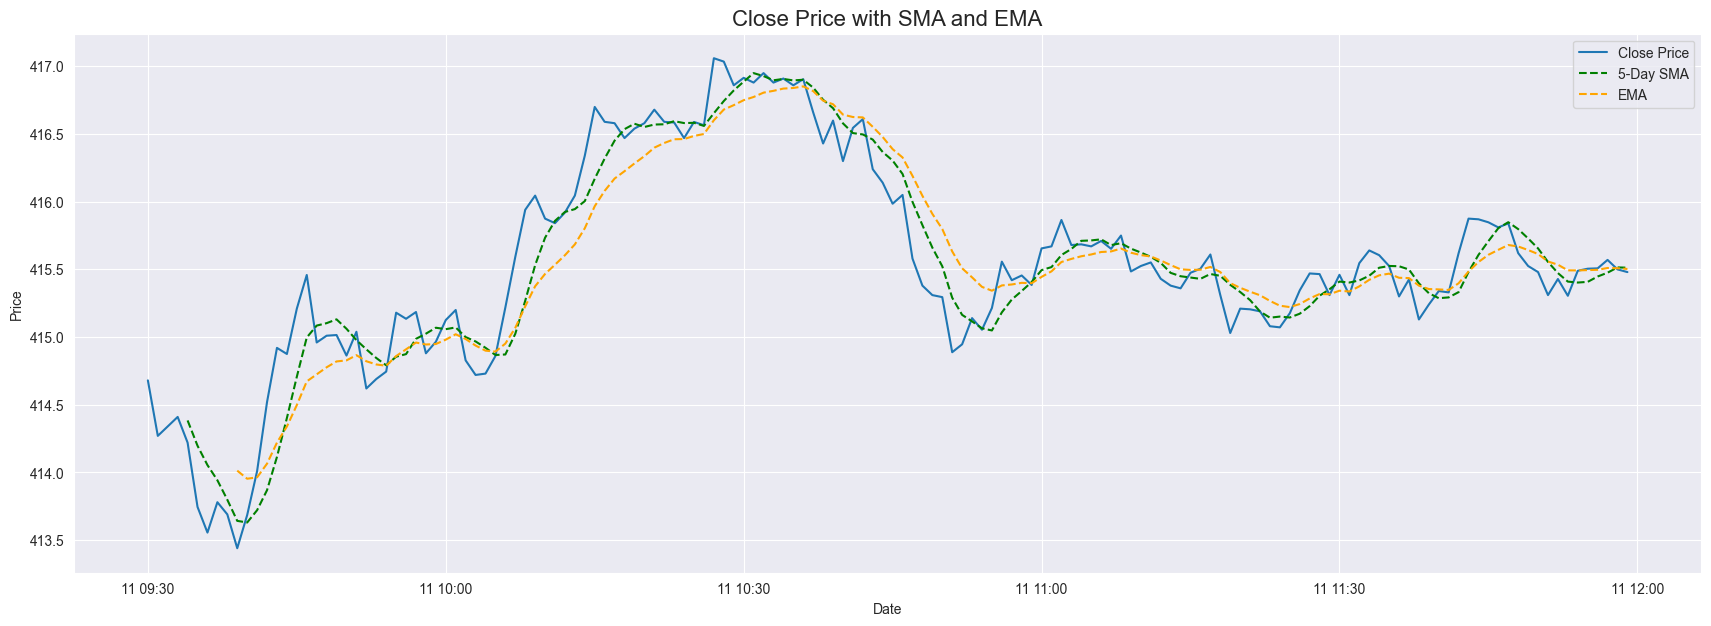

In [2]:
plt.figure(figsize=(21, 7))
plt.plot(data.index, data["Close"], label="Close Price")
plt.plot(data.index, data["SMA_5"], label="5-Day SMA", color="green", linestyle="--")
plt.plot(
    data.index, data["EMA"], label="EMA", color="orange", linestyle="--"  
)
plt.title("Close Price with SMA and EMA", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

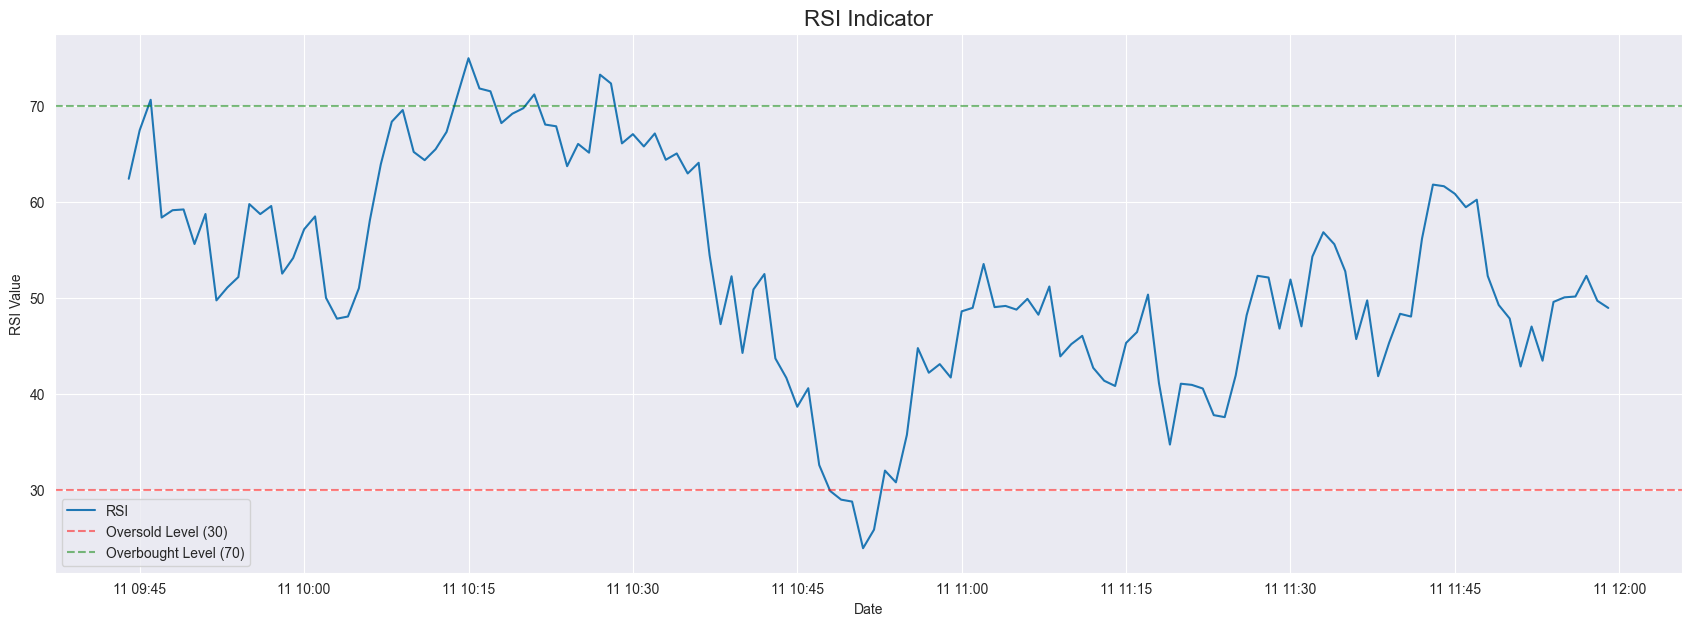

In [3]:
plt.figure(figsize=(21, 7))
plt.plot(data.index, data["RSI"], label="RSI")
plt.axhline(30, linestyle="--", alpha=0.5, color="red", label="Oversold Level (30)")
plt.axhline(70, linestyle="--", alpha=0.5, color="green", label="Overbought Level (70)")
plt.title("RSI Indicator", fontsize=16)
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.show()

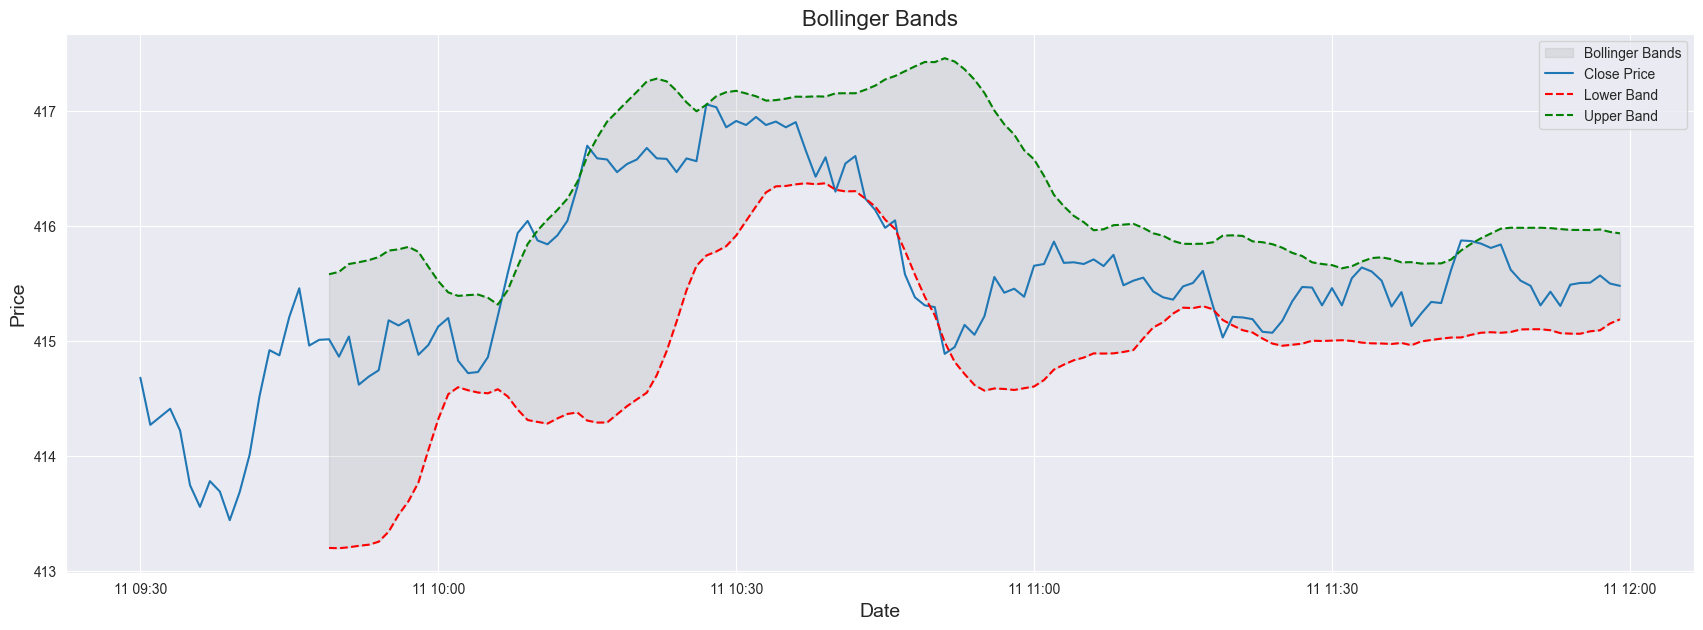

In [6]:
plt.figure(figsize=(21, 7))
plt.fill_between(
    data.index,
    data["BollingerB_Lower"],
    data["BollingerB_Upper"],
    color="gray",
    alpha=0.15,
    label="Bollinger Bands",
)
plt.plot(data["Close"], label="Close Price")
plt.plot(data["BollingerB_Lower"], linestyle="--", color="red", label="Lower Band")
plt.plot(data["BollingerB_Upper"], linestyle="--", color="green", label="Upper Band")
plt.title("Bollinger Bands", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.legend()
plt.show()

In [7]:
from sofware.strategy import generate_signals


processed_data = generate_signals(data)

print("processed_data.head(): ", processed_data.head(), "\n")
print("data.columns: ", data.columns, "\n")

KeyError: ['ATR_Stop_Loss', 'ATR_Take_Profit']

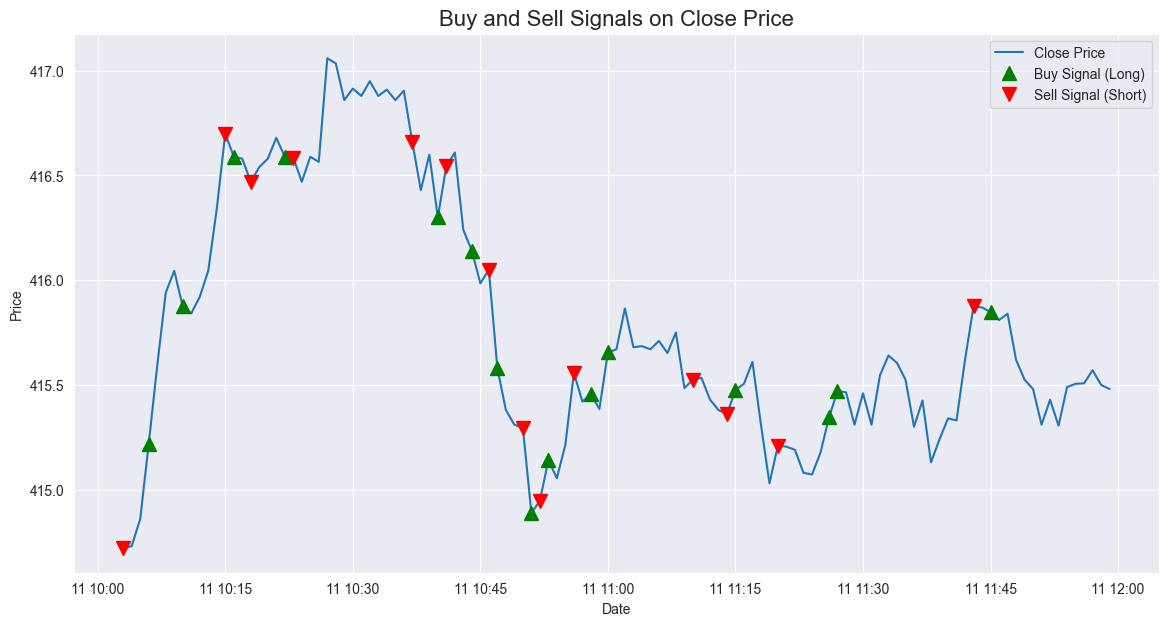

In [99]:
# Assuming 'processed_data' contains your signals
plt.figure(figsize=(14, 7))
plt.plot(
    processed_data.index, processed_data["Close"], label="Close Price"
)

buy_signals = processed_data[processed_data["Signal"] == 1]
plt.plot(
    buy_signals.index,
    buy_signals["Close"],
    "^",
    markersize=10,
    color="g",
    label="Buy Signal (Long)",
)

sell_signals = processed_data[processed_data["Signal"] == -1]
plt.plot(
    sell_signals.index,
    sell_signals["Close"],
    "v",
    markersize=10,
    color="r",
    label="Sell Signal (Short)",
)

plt.title("Buy and Sell Signals on Close Price", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

Running back tests for MSFT from 2024-10-11 09:30:00 to 2024-10-11 16:00:00...
Price: 414.7200012207031
Stop_Loss_Pct: 0.0013791975453315579
ATR_Stop_Loss_Dollar: 0.5719808076834945
Equity: 10000.0, Risk Amount: 100.0
Risk Amount: 100.0
ATR_Stop_Loss_Dollar: 0.5719808076834945, Position Size: 174.8310409312457
Total Cost: 72542.14622021247
Margin Required: 72542.14622021247
Cash after opening position: $-0.00
Price: 415.2185974121094
Stop_Loss_Pct: 0.0013674598397651874
ATR_Stop_Loss_Dollar: 0.5677947566846889
Equity: 9997.014445877849, Risk Amount: 99.97014445877849
Risk Amount: 99.97014445877849
ATR_Stop_Loss_Dollar: 0.5677947566846889, Position Size: 176.0673963290832
Total Cost: 73216.1535930232
Margin Required: 73216.1535930232
Cash after opening position: $0.00
Price: 415.9200134277344
Stop_Loss_Pct: 0.001320357373427868
ATR_Stop_Loss_Dollar: 0.5491630564855269
Equity: 9988.897351598076, Risk Amount: 99.88897351598077
Risk Amount: 99.88897351598077
ATR_Stop_Loss_Dollar: 0.5491630

/Users/ju/Works/perso/algo_day_trading/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Cash after opening position: $0.00
Price: 416.29998779296875
Stop_Loss_Pct: 0.0010296728628414683
ATR_Stop_Loss_Dollar: 0.4286528002316545
Equity: 9969.02849158764, Risk Amount: 99.6902849158764
Risk Amount: 99.6902849158764
ATR_Stop_Loss_Dollar: 0.4286528002316545, Position Size: 232.56650805034127
Total Cost: 96962.70902282128
Margin Required: 96962.70902282128
Cash after opening position: $0.00
Price: 416.5450134277344
Stop_Loss_Pct: 0.0010275753530573954
ATR_Stop_Loss_Dollar: 0.42803138923730166
Equity: 9949.988711949456, Risk Amount: 99.49988711949456
Risk Amount: 99.49988711949456
ATR_Stop_Loss_Dollar: 0.42803138923730166, Position Size: 232.4593233612864
Total Cost: 96878.13844202858
Margin Required: 96878.13844202858
Cash after opening position: $0.00
Price: 416.1404113769531
Stop_Loss_Pct: 0.0009888355883222312
ATR_Stop_Loss_Dollar: 0.41149444850858474
Equity: 9925.423448542166, Risk Amount: 99.25423448542166
Risk Amount: 99.25423448542166
ATR_Stop_Loss_Dollar: 0.4114944485085

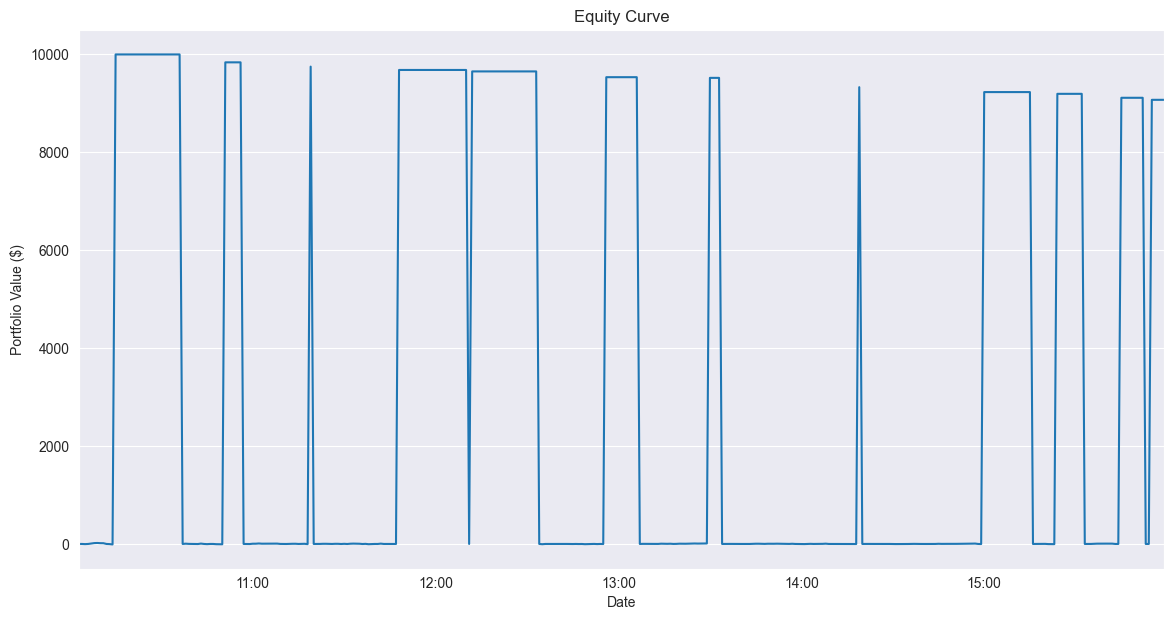

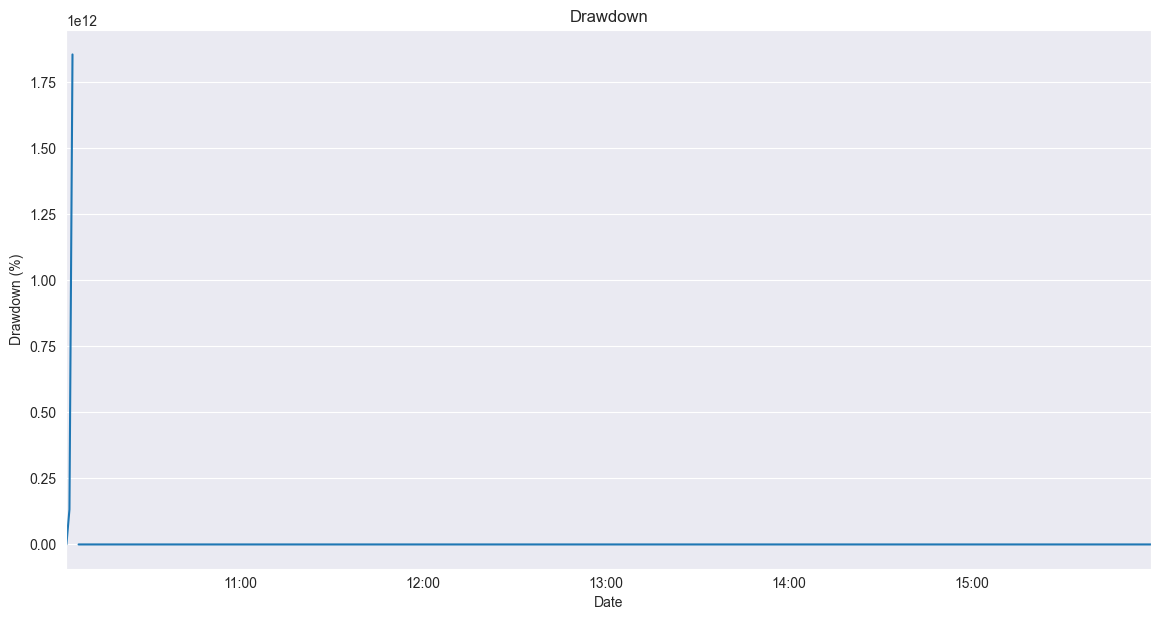

In [ ]:
result = run_back_test(
    ticker=ticker,
    start_date=start_date,
    end_date=end_date,
)